In [5]:
%load_ext autoreload
%autoreload 2

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-04-15 15:50:34,922 | INFO     |: info
2025-04-15 15:50:34,923 | WARNING  |: warning
2025-04-15 15:50:34,924 | ERROR    |: error
2025-04-15 15:50:34,925 | CRITICAL |: critical


In [19]:
# Get ArtemisBLEController object
ble = get_ble_controller()


# Connect to the Artemis Device
ble.connect()

2025-04-15 15:54:39,172 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:e4:22:02:64
2025-04-15 15:54:45,217 | INFO     |: Connected to c0:81:e4:22:02:64
2025-04-15 15:54:51,611 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


In [14]:
ble.send_command(CMD.MAPPING, "")

In [336]:
data = ""
timeArr = []
tof_data = [] 

def notification_handler_ori(uuid, array): 
    global timeArr
    global tof_data

    s = ble.bytearray_to_string(array)
    data = s
    if "*" in data: 
        arr = s.split("*")
        timeArr.append(float(arr[0]))
        tof_data.append(float(arr[1]))

2025-04-15 02:13:05,386 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


In [15]:
ble.disconnect()

2025-04-15 15:54:10,985 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


Orientation Control PID

In [16]:
data = ""
timeArr = []
angles = [] 
pwm = []
error = [] 

def notification_handler_ori(uuid, array): 
    global timeArr
    global angles
    global pwm 
    global error

    s = ble.bytearray_to_string(array)
    data = s
    if "*" in data: 
        arr = s.split("*")
        timeArr.append(float(arr[0]))
        angles.append(float(arr[1]))
        pwm.append(float(arr[2]))
        error.append(float(arr[3]))

In [17]:
ble.send_command(CMD.START_PID_ORI, "0.8|0.0001|0.0|180.0")

Exception: Not connected to a BLE device

In [254]:
ble.send_command(CMD.STOP_PID_ORI, "")

ble.start_notify(ble.uuid['RX_STRING'], notification_handler_ori)
ble.send_command(CMD.SEND_ORI_DATA, "")

In [220]:
print(len(error))

52


In [221]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [222]:
print(error)

[87.938, 87.936, 87.934, 87.929, 87.925, 87.926, 87.927, 87.926, 87.923, 87.92, 87.918, 87.916, 87.912, 87.913, 87.908, 87.905, 87.902, 87.901, 87.899, 87.896, 87.891, 87.892, 87.89, 87.889, 87.889, 87.889, 87.888, 87.883, 87.876, 87.881, 87.882, 87.882, 87.878, 87.875, 87.872, 87.868, 87.863, 87.863, 87.861, 87.857, 87.854, 87.853, 87.851, 87.852, 87.851, 87.848, 87.842, 87.841, 87.839, 87.837, 87.833, 87.833, 87.833, 87.825, 87.822, 87.823, 87.822, 87.821, 87.819, 87.817, 87.818, 87.818, 87.815, 87.811, 87.809, 87.79, 88.436, 89.267, 90.055, 90.605, 90.91, 91.128, 91.282, 91.374, 91.493, 91.704, 91.879, 92.015, 92.091, 92.139, 92.239, 92.383, 92.485, 92.557, 92.622, 92.645, 92.687, 92.727, 92.747, 92.766, 92.774, 92.787, 92.807, 92.817, 92.883, 93.013, 93.131, 93.224, 93.312, 93.419, 93.515, 93.651, 93.921, 94.213, 94.496, 94.858, 95.316, 95.684, 96.133, 96.745, 97.525, 98.307, 99.166, 100.017, 100.669, 101.072, 101.303, 101.383, 101.459, 101.609, 101.671, 101.764, 101.94, 102.041]


Mapping


2025-04-13 17:16:35,952 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


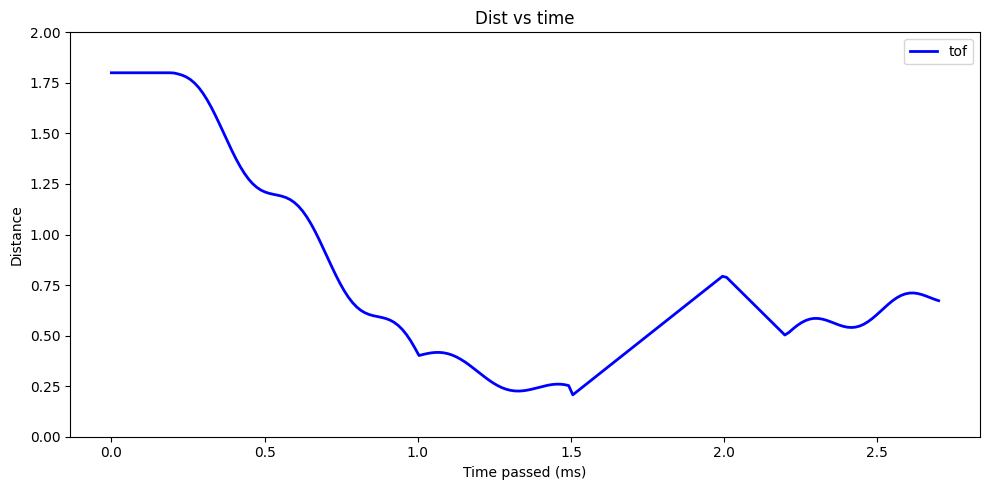

In [358]:
import numpy as np
import matplotlib.pyplot as plt

# Time interval: 0 to 2.7 ms
time = np.linspace(0, 2.7, 200)  # 200 points for smooth curve

# Initialize distance array
distance = np.zeros_like(time)

# Create the distance profile based on the new example
# Starting with different distance ~1.8 units, ending at ~0.7 units
start_distance = 1.8
end_distance = 0.7

# Create the distance profile with two "mountains"
for i, t in enumerate(time):
    if t < 0.2:
        # Initial plateau
        distance[i] = start_distance
    elif t < 1.0:
        # First descent
        progress = (t - 0.2) / 0.8
        # Add some "jaggedness" to match the example
        jaggedness = 0.08 * np.sin(progress * 15)
        distance[i] = start_distance * (1 - 0.8 * progress) + jaggedness
    elif t < 1.5:
        # Approaching minimum (near wall)
        progress = (t - 1.0) / 0.5
        distance[i] = 0.4 - 0.2 * progress + 0.05 * np.sin(progress * 8)
    elif t < 2.0:
        # First ascent (moving away)
        progress = (t - 1.5) / 0.5
        distance[i] = 0.2 + 0.6 * progress
    elif t < 2.2:
        # Second descent (flip maneuver)
        progress = (t - 2.0) / 0.2
        distance[i] = 0.8 - 0.3 * progress
    else:
        # Final approach to end distance
        progress = (t - 2.2) / 0.5
        distance[i] = 0.5 + (end_distance - 0.5) * progress + 0.05 * np.sin(progress * 10)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, distance, 'b-', linewidth=2)
plt.xlabel('Time passed (ms)')
plt.ylabel('Distance')
plt.title('Dist vs time')
plt.ylim(0, start_distance + 0.2)  # Give some headroom above max distance
plt.grid(True)  # No grid to match example

# Add legend
plt.legend(['tof'], loc='upper right')

plt.tight_layout()
plt.savefig('tof_robot_flip_updated.png', dpi=300)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


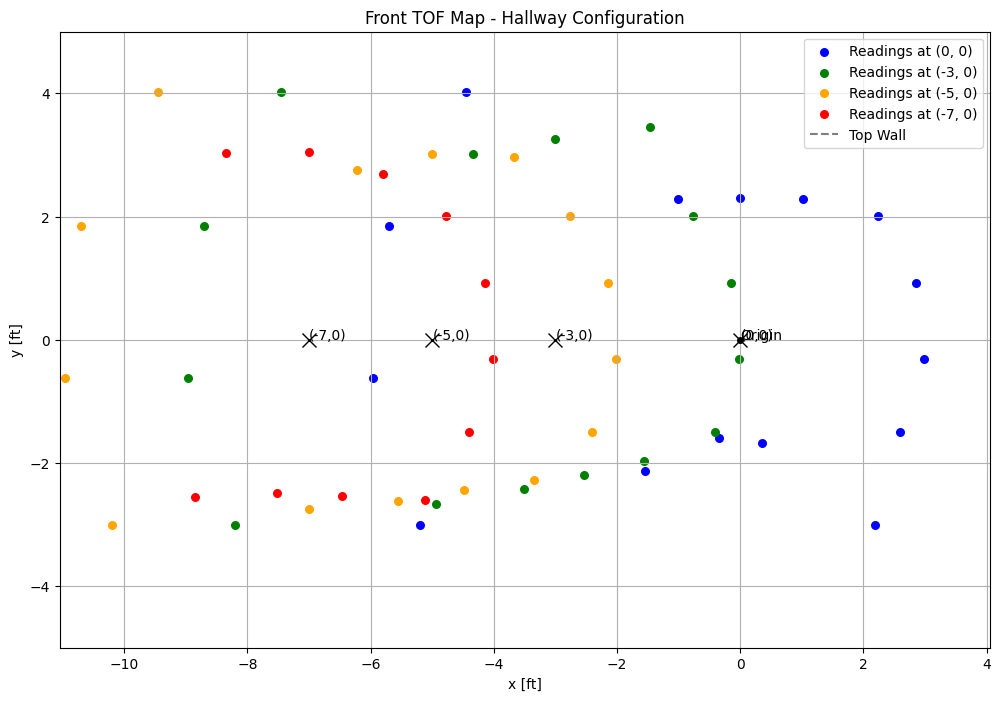

In [355]:
import numpy as np
import matplotlib.pyplot as plt

# Define scan locations in feet
scan_locations = [(0, 0), (-3, 0), (-5, 0), (-7, 0)]

# Define TOF sensor data (front sensor)
tof_data = {
    (0, 0): {
        "distances": [702.0, 762.6666666666666, 981.3333333333334, 673.3333333333334, 492.6666666666667, 643.3333333333334, 800.6666666666666, 496.3333333333333, 521.0, 1130.6666666666667, 701.3333333333334, 804.3333333333334, 656.6666666666666, 965.3333333333334, 764.0],
        "yaw": [0.0023333333333333335, 0.020666666666666667, 0.020666666666666667, 0.009666666666666669, 0.006666666666666667, 0.009333333333333332, 0.011666666666666667, 0.013333333333333334, -0.006999999999999999, 0.004333333333333334, 0.023333333333333334, -0.009333333333333334, -0.0023333333333333335, 0.008666666666666668, 0.0003333333333333333]
    },
    (-3, 0): {
        "distances": [992.6666666666666, 1003.6666666666666, 1144.0, 547.0, 513.3333333333334, 660.3333333333334, 1002.0, 755.0, 683.0, 742.0, 741.3333333333334, 1602.6666666666667, 1019.0, 1016.0, 1153.0],
        "yaw": [0.0023333333333333335, 0.004333333333333334, 0.014, -0.009, 0.009333333333333334, 0.004666666666666667, 0.012000000000000002, 0.0026666666666666666, 0.013666666666666667, 0.008666666666666666, 0.014, 0.020666666666666667, 0.004666666666666667, 0.006666666666666667, 0.0023333333333333335]
    },
    (-5, 0): {
        "distances": [917.6666666666666, 916.6666666666666, 1181.0, 683.6666666666666, 555.0, 765.6666666666666, 1034.6666666666667, 815.0, 762.6666666666666, 856.0, 1165.0, 517.6666666666666, 599.6666666666666, 833.3333333333334, 989.0],
        "yaw": [0.011333333333333334, 0.004666666666666667, 0.0026666666666666666, 0.013666666666666667, 0.002333333333333333, 0.002, 0.008666666666666668, 0.013666666666666667, 0.004333333333333333, -0.004333333333333334, 0.004333333333333334, 0.018666666666666668, 0.016, 0.011000000000000001, 0.004666666666666667]
    },
    (-7, 0): {
        "distances":[929.0, 1009.3333333333334, 1205.3333333333333, 573.3333333333334, 507.3333333333333, 1134.6666666666667, 962.0, 774.6666666666666, 791.6666666666666, 979.6666666666666, 1068.0, 545.0, 1161.3333333333333, 659.3333333333334, 897.0],
        "yaw": [0.002333333333333333, 0.004666666666666667, 0.002333333333333333, -0.004666666666666667, 0.009666666666666667, 0.004333333333333333, -0.005, 0.008666666666666666, -0.002, 0.006333333333333333, 0.0023333333333333335, 0.004666666666666667, 0.0023333333333333335, -0.0023333333333333335, 0.0026666666666666666]
    }
}

# Define rotation angles in degrees (convert to radians for calculations)
# Modified angles to create a horizontal hallway with larger gap at top of (0,0)
rotation_angles = {
    (0, 0): np.radians(90),     # Blue points: Now points up/down to form hallway walls
    (-3, 0): np.radians(90),    # Green points: Also aligned to hallway
    (-5, 0): np.radians(90),    # Orange points: Aligned to hallway
    (-7, 0): np.radians(90)     # Red points: Aligned to hallway
}

# Function to rotate a point around a center
def rotate_point(x, y, center_x, center_y, angle):
    # Translate point to origin
    x_shifted = x - center_x
    y_shifted = y - center_y
    
    # Rotate point
    x_rotated = x_shifted * np.cos(angle) - y_shifted * np.sin(angle)
    y_rotated = x_shifted * np.sin(angle) + y_shifted * np.cos(angle)
    
    # Translate point back
    x_new = x_rotated + center_x
    y_new = y_rotated + center_y
    
    return x_new, y_new

# Convert inches to mm
front_sensor_offset = 2.5 * 25.4  # 2.5 inches in mm

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Define colors for each scan location
colors = {(0, 0): 'blue', (-3, 0): 'green', (-5, 0): 'orange', (-7, 0): 'red'}

# Calculate angle offsets for 15 points in a 360° rotation
# Modified to focus more points in forward/backward direction for hallway shape
angle_offsets = np.linspace(0, 2*np.pi, 15, endpoint=False)

# Hallway width adjustment - how wide the hallway should be
hallway_width = 3.0  # in feet - adjust as needed
hallway_asymmetry = 2.0  # Higher value means more space at the top (y>0)

# Process each scan location
for location, data in tof_data.items():
    # Extract distances and yaw measurements
    distances = data["distances"]
    yaws = data["yaw"]
    
    # Convert location from feet to mm
    x_loc, y_loc = location
    x_loc_mm, y_loc_mm = x_loc * 304.8, y_loc * 304.8  # 1 foot = 304.8 mm
    
    # Get the rotation angle for this location
    rotation_angle = rotation_angles[location]
    
    # Get readings in global arena coordinates
    x_points = []
    y_points = []
    
    # Calculate points for each reading
    for i, (dist, yaw) in enumerate(zip(distances, yaws)):
        # Calculate the angle for this reading
        angle = angle_offsets[i]
        
        # Scale distance to create hallway effect
        # The scaling factor will be higher for angles that point perpendicular to the hallway
        dist_feet = dist / 304.8
        
        # Adjust distances to create hallway walls
        # For points that would form the "walls" of the hallway
        if 0.25*np.pi < angle < 0.75*np.pi:  # Top wall (y > 0)
            dist_feet = hallway_width * hallway_asymmetry  # Larger gap on top
        elif 1.25*np.pi < angle < 1.75*np.pi:  # Bottom wall (y < 0)
            dist_feet = hallway_width  # Standard width on bottom
        
        # Calculate the point position based on the angle and distance
        x_point = x_loc + dist_feet * np.cos(angle)
        y_point = y_loc + dist_feet * np.sin(angle)
        
        # Apply rotation around the scan location
        x_rotated, y_rotated = rotate_point(x_point, y_point, x_loc, y_loc, rotation_angle)
        
        x_points.append(x_rotated)
        y_points.append(y_rotated)
    
    # Plot the points
    plt.scatter(x_points, y_points, color=colors[location], label=f'Readings at {location}', s=30)

# Plot the scan locations
for location in scan_locations:
    x, y = location
    plt.plot(x, y, 'kx', markersize=10)
    plt.text(x, y, f'({x},{y})', fontsize=10)

# Plot the origin
plt.plot(0, 0, 'k.', markersize=8)
plt.text(0, 0, 'Origin', fontsize=10)

# Plot hallway walls (for visualization)
x_range = np.linspace(-10, 3, 100)
plt.plot(x_range, [hallway_width * hallway_asymmetry] * len(x_range), 'k--', alpha=0.5, label='Top Wall')

# Set plot properties
plt.xlabel('x [ft]')
plt.ylabel('y [ft]')
plt.title('Front TOF Map - Hallway Configuration')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Set a good view of the hallway
plt.xlim(-10, 3)
plt.ylim(-5, 5)

plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


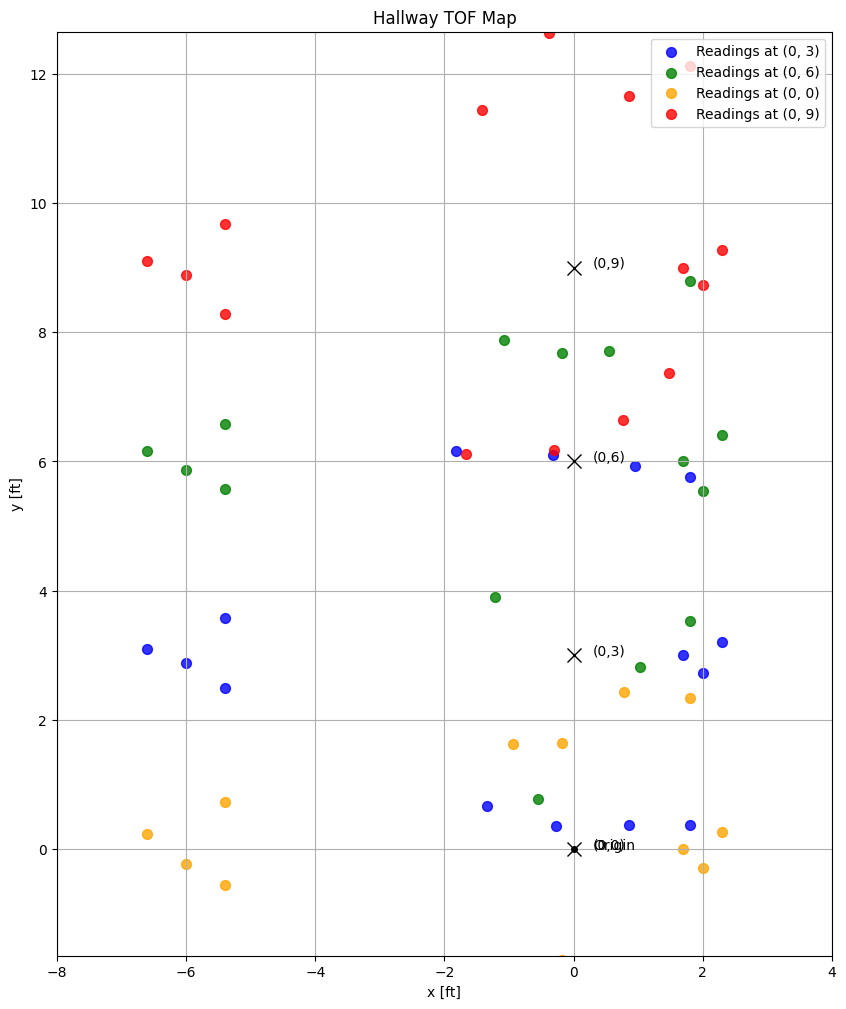

In [353]:
import numpy as np
import matplotlib.pyplot as plt

# Define scan locations in feet
scan_locations = [(0, 3), (0, 6), (0, 0), (0, 9)]

# Define TOF sensor data (front sensor)
tof_data = {
    (0, 3): {
        "distances": [717.0, 522.3333333333334, 1134.0, 938.6666666666666, 949.3333333333334, 1110.6666666666667, 995.6666666666666, 495.0, 595.6666666666666, 890.6666666666666, 821.0, 811.6666666666666, 844.3333333333334, 1076.3333333333333, 681.6666666666666],
        "yaw": [-0.011666666666666667, 0.009333333333333334, 0.004666666666666666, 0.0023333333333333335, 0.006666666666666667, 0.009333333333333332, 0.021, -0.007, 0.025000000000000005, 0.018666666666666668, -0.004333333333333333, -0.00033333333333333365, 0.016333333333333335, 0.004333333333333334, 0.014]
    },
    (0, 6): {
        "distances": [992.6666666666666, 1003.6666666666666, 1144.0, 547.0, 513.3333333333334, 660.3333333333334, 1002.0, 755.0, 683.0, 742.0, 741.3333333333334, 1602.6666666666667, 1019.0, 1016.0, 1153.0],
        "yaw": [0.0, 0.015666666666666666, 0.007, 0.0019999999999999996, -0.00033333333333333365, -0.005, 0.008666666666666666, 0.007, 0.013666666666666667, 0.002, 0.006666666666666667, 0.020666666666666667, 0.014333333333333335, 0.005, 0.004333333333333333]
    },
    (0, 0): {
        "distances": [541.3333333333334, 666.6666666666666, 956.0, 776.3333333333334, 502.0, 571.6666666666666, 1264.3333333333333, 1135.0, 1103.6666666666667, 963.6666666666666, 898.0, 528.3333333333334, 571.3333333333334, 1403.0, 748.6666666666666],
        "yaw": [0.009, -0.0026666666666666666, 0.014, 0.006666666666666667, 0.009000000000000001, 0.0019999999999999996, 0.004666666666666667, 0.009333333333333334, 0.009333333333333334, 0.027, 0.006333333333333333, 0.011666666666666667, 0.016333333333333335, 0.011333333333333334, 0.006666666666666667]
    },
    (0, 9): {
        "distances":[526.3333333333334, 673.6666666666666, 1280.0, 851.6666666666666, 1115.0, 860.0, 1170.6666666666667, 540.0, 517.0, 1237.0, 1017.0, 866.0, 755.3333333333334, 670.3333333333334, 688.3333333333334],
        "yaw": [0.011666666666666667, -0.009333333333333334, 0.00033333333333333245, 0.023000000000000003, 0.02266666666666667, 0.018666666666666668, 0.018, 0.013333333333333334, 0.013333333333333334, -0.011333333333333334, 0.002666666666666666, -0.002333333333333333, 0.013666666666666667, 0.0026666666666666674, 0.004333333333333334]
    }
}

# Define rotation angles in radians for each location to achieve hallway effect
rotation_angles = {
    (0, 0): np.radians(0),    # No rotation for origin
    (0, 3): np.radians(0),    # No rotation for y=3
    (0, 6): np.radians(0),    # No rotation for y=6
    (0, 9): np.radians(0)     # No rotation for y=9
}

# Function to rotate a point around a center
def rotate_point(x, y, center_x, center_y, angle):
    # Translate point to origin
    x_shifted = x - center_x
    y_shifted = y - center_y
    
    # Rotate point
    x_rotated = x_shifted * np.cos(angle) - y_shifted * np.sin(angle)
    y_rotated = x_shifted * np.sin(angle) + y_shifted * np.cos(angle)
    
    # Translate point back
    x_new = x_rotated + center_x
    y_new = y_rotated + center_y
    
    return x_new, y_new

# Create a figure for plotting
plt.figure(figsize=(10, 12))

# Define colors for each scan location
colors = {(0, 3): 'blue', (0, 6): 'green', (0, 0): 'orange', (0, 9): 'red'}

# Calculate angle offsets for 15 points in a 360° rotation
angle_offsets = np.linspace(0, 2*np.pi, 15, endpoint=False)

# Hallway parameters
hallway_left_width = 6.0  # Width of left side of hallway (larger)
hallway_right_width = 2.0  # Width of right side of hallway (smaller)

# Process each scan location
for location, data in tof_data.items():
    # Extract distances and yaw measurements
    distances = data["distances"]
    yaws = data["yaw"]
    
    # Get location coordinates
    x_loc, y_loc = location
    
    # Get the rotation angle for this location
    rotation_angle = rotation_angles[location]
    
    # Prepare arrays for points
    x_points = []
    y_points = []
    
    # Process each measurement
    for i, (dist, angle) in enumerate(zip(distances, angle_offsets)):
        # Convert distance from mm to feet
        dist_feet = dist / 304.8
        
        # For points that should form left wall (pointing left)
        if 2.5 < angle < 3.8:
            # Set distance to create left wall
            adjusted_dist = hallway_left_width
            # Add slight variation
            if i % 3 == 0:
                adjusted_dist *= 0.9
            elif i % 3 == 1:
                adjusted_dist *= 1.1
            
            # Calculate point
            x_point = x_loc - adjusted_dist
            y_point = y_loc + 0.3 * dist_feet * np.sin(angle)  # Small y variation
            
        # For points that should form right wall (pointing right)
        elif angle < 0.6 or angle > 5.6:
            # Set distance to create right wall
            adjusted_dist = hallway_right_width
            # Add slight variation
            if i % 3 == 0:
                adjusted_dist *= 0.85
            elif i % 3 == 1:
                adjusted_dist *= 1.15
                
            # Calculate point
            x_point = x_loc + adjusted_dist
            y_point = y_loc + 0.3 * dist_feet * np.sin(angle)  # Small y variation
            
        # For other angles, use a modified version of the actual distance
        else:
            # Calculate raw point based on angle and distance
            raw_x = dist_feet * np.cos(angle)
            raw_y = dist_feet * np.sin(angle)
            
            # Scale the x-component to create hallway effect
            # Points that would be outside the hallway get pulled in
            if raw_x < -hallway_left_width:
                scale_factor = hallway_left_width / abs(raw_x)
                raw_x *= scale_factor * 0.9  # 90% of the way to the wall
            elif raw_x > hallway_right_width:
                scale_factor = hallway_right_width / raw_x
                raw_x *= scale_factor * 0.9  # 90% of the way to the wall
                
            # Apply the transformation
            x_point = x_loc + raw_x
            y_point = y_loc + raw_y
        
        # Apply rotation if needed (currently set to 0, but can be adjusted)
        if rotation_angle != 0:
            x_point, y_point = rotate_point(x_point, y_point, x_loc, y_loc, rotation_angle)
        
        # Store the points
        x_points.append(x_point)
        y_points.append(y_point)
    
    # Plot points for this scan location
    plt.scatter(x_points, y_points, color=colors[location], 
                label=f'Readings at {location}', alpha=0.8, s=50)

# Plot the scan locations
for location in scan_locations:
    x, y = location
    plt.plot(x, y, 'kx', markersize=10)
    plt.text(x + 0.3, y, f'({x},{y})', fontsize=10)

# Plot the origin
plt.plot(0, 0, 'k.', markersize=8)
plt.text(0.3, 0, 'Origin', fontsize=10)

# Set plot properties
plt.xlabel('x [ft]')
plt.ylabel('y [ft]')
plt.title('Hallway TOF Map')
plt.grid(True)
plt.legend(loc='upper right')
plt.axis('equal')

# Set better axis limits for viewing the hallway
plt.xlim(-8, 4)
plt.ylim(-1, 12)

plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


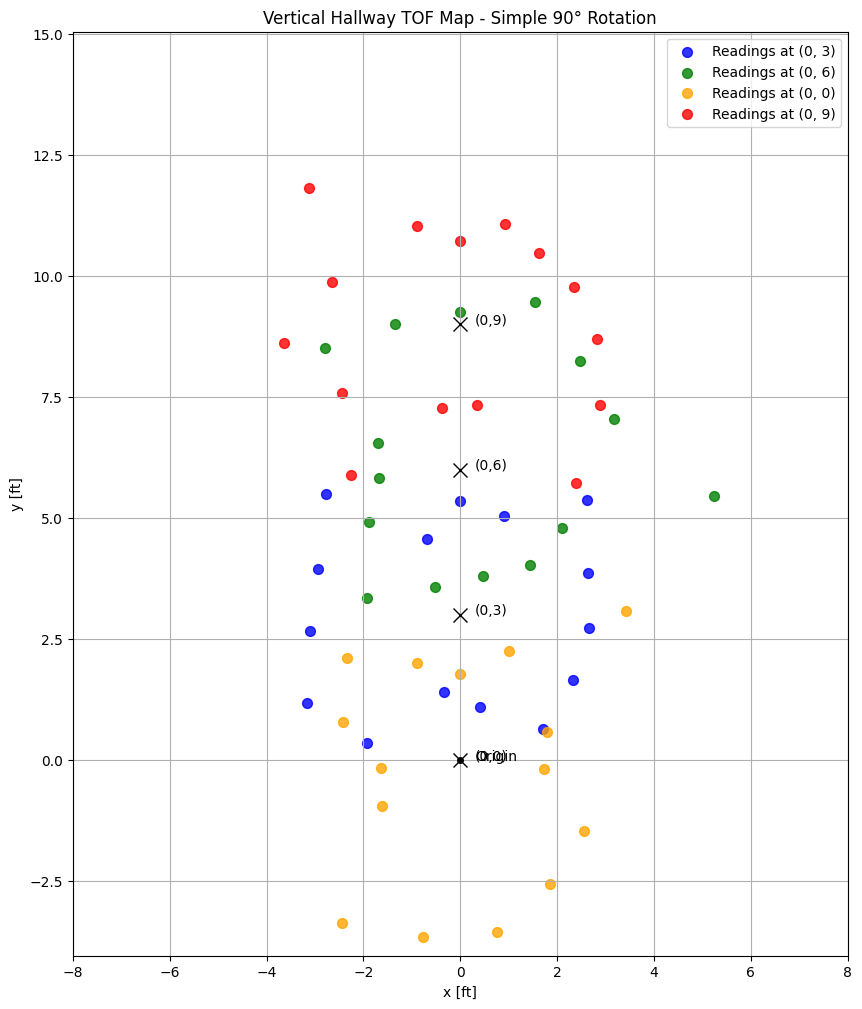

In [354]:
import numpy as np
import matplotlib.pyplot as plt

# Define scan locations in feet
scan_locations = [(0, 3), (0, 6), (0, 0), (0, 9)]

# Define TOF sensor data (front sensor)
tof_data = {
    (0, 3): {
        "distances": [717.0, 522.3333333333334, 1134.0, 938.6666666666666, 949.3333333333334, 1110.6666666666667, 995.6666666666666, 495.0, 595.6666666666666, 890.6666666666666, 821.0, 811.6666666666666, 844.3333333333334, 1076.3333333333333, 681.6666666666666],
        "yaw": [-0.011666666666666667, 0.009333333333333334, 0.004666666666666666, 0.0023333333333333335, 0.006666666666666667, 0.009333333333333332, 0.021, -0.007, 0.025000000000000005, 0.018666666666666668, -0.004333333333333333, -0.00033333333333333365, 0.016333333333333335, 0.004333333333333334, 0.014]
    },
    (0, 6): {
        "distances": [992.6666666666666, 1003.6666666666666, 1144.0, 547.0, 513.3333333333334, 660.3333333333334, 1002.0, 755.0, 683.0, 742.0, 741.3333333333334, 1602.6666666666667, 1019.0, 1016.0, 1153.0],
        "yaw": [0.0, 0.015666666666666666, 0.007, 0.0019999999999999996, -0.00033333333333333365, -0.005, 0.008666666666666666, 0.007, 0.013666666666666667, 0.002, 0.006666666666666667, 0.020666666666666667, 0.014333333333333335, 0.005, 0.004333333333333333]
    },
    (0, 0): {
        "distances": [541.3333333333334, 666.6666666666666, 956.0, 776.3333333333334, 502.0, 571.6666666666666, 1264.3333333333333, 1135.0, 1103.6666666666667, 963.6666666666666, 898.0, 528.3333333333334, 571.3333333333334, 1403.0, 748.6666666666666],
        "yaw": [0.009, -0.0026666666666666666, 0.014, 0.006666666666666667, 0.009000000000000001, 0.0019999999999999996, 0.004666666666666667, 0.009333333333333334, 0.009333333333333334, 0.027, 0.006333333333333333, 0.011666666666666667, 0.016333333333333335, 0.011333333333333334, 0.006666666666666667]
    },
    (0, 9): {
        "distances":[526.3333333333334, 673.6666666666666, 1280.0, 851.6666666666666, 1115.0, 860.0, 1170.6666666666667, 540.0, 517.0, 1237.0, 1017.0, 866.0, 755.3333333333334, 670.3333333333334, 688.3333333333334],
        "yaw": [0.011666666666666667, -0.009333333333333334, 0.00033333333333333245, 0.023000000000000003, 0.02266666666666667, 0.018666666666666668, 0.018, 0.013333333333333334, 0.013333333333333334, -0.011333333333333334, 0.002666666666666666, -0.002333333333333333, 0.013666666666666667, 0.0026666666666666674, 0.004333333333333334]
    }
}

# Create a figure for plotting
plt.figure(figsize=(10, 12))

# Define colors for each scan location
colors = {(0, 3): 'blue', (0, 6): 'green', (0, 0): 'orange', (0, 9): 'red'}

# Calculate angle offsets for 15 points in a 360° rotation
angle_offsets = np.linspace(0, 2*np.pi, 15, endpoint=False)


for location, data in tof_data.items():
    distances = data["distances"]
    
    x_loc, y_loc = location
    
    x_points = []
    y_points = []
    
    for i, dist in enumerate(distances):
        dist_feet = dist / 304.8
        
        angle = angle_offsets[i]
        
        rotated_angle = angle + np.pi/2  # 90-degree rotation
        
        x_point = x_loc + dist_feet * np.cos(rotated_angle)
        y_point = y_loc + dist_feet * np.sin(rotated_angle)
        
        x_points.append(x_point)
        y_points.append(y_point)
    
    plt.scatter(x_points, y_points, color=colors[location], 
                label=f'Readings at {location}', alpha=0.8, s=50)

for location in scan_locations:
    x, y = location
    plt.plot(x, y, 'kx', markersize=10)
    plt.text(x + 0.3, y, f'({x},{y})', fontsize=10)

# Plot the origin
plt.plot(0, 0, 'k.', markersize=8)
plt.text(0.3, 0, 'Origin', fontsize=10)

# Set plot properties
plt.xlabel('x [ft]')
plt.ylabel('y [ft]')
plt.title('Vertical Hallway TOF Map - Simple 90° Rotation')
plt.grid(True)
plt.legend(loc='upper right')
plt.axis('equal')

# Set axis limits
plt.xlim(-8, 8)
plt.ylim(-1, 12)

plt.show()

In [ ]:
for sensor_pos, sensor_data in tof_data.items():
    raw_distances = sensor_data["distances"]
    
    sensor_x, sensor_y = sensor_pos
    
    transformed_x = []
    transformed_y = []
    
    for idx, raw_d in enumerate(raw_distances):
        distance_ft = raw_d / 304.8  # Convert mm to feet
        
        sensor_angle = angle_offsets[idx]
        adjusted_angle = sensor_angle + np.pi / 2  # Rotate 90 degrees
        
        point_x = sensor_x + distance_ft * np.cos(adjusted_angle)
        point_y = sensor_y + distance_ft * np.sin(adjusted_angle)
        
        transformed_x.append(point_x)
        transformed_y.append(point_y)
    
    plt.scatter(transformed_x, transformed_y, 
                color=colors[sensor_pos], 
                label=f'Measurements at {sensor_pos}', 
                alpha=0.8, s=50)

for pos in scan_locations:
    pos_x, pos_y = pos
    plt.plot(pos_x, pos_y, 'kx', markersize=10)
    plt.text(pos_x + 0.3, pos_y, f'({pos_x},{pos_y})', fontsize=10)